C:\Users\Dharani Ravi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7741 - loss: 0.8651 - val_accuracy: 0.8998 - val_loss: 0.3518
Epoch 2/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9062 - loss: 0.3412 - val_accuracy: 0.9102 - val_loss: 0.3130
Epoch 3/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9143 - loss: 0.3060 - val_accuracy: 0.9150 - val_loss: 0.3001
Epoch 4/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9223 - loss: 0.2915 - val_accuracy: 0.9171 - val_loss: 0.2992
Epoch 5/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9235 - loss: 0.2799 - val_accuracy: 0.9165 - val_loss: 0.2975
Epoch 6/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9247 - loss: 0.2721 - val_accuracy: 0.9190 - val_loss: 0.2925
Epoch 7/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9275 - loss: 0.2670 - val_accuracy: 0.9216 - val_loss: 0.2887
Epoch 8/10
880/880 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9299 - loss: 0.2578 - val_accur

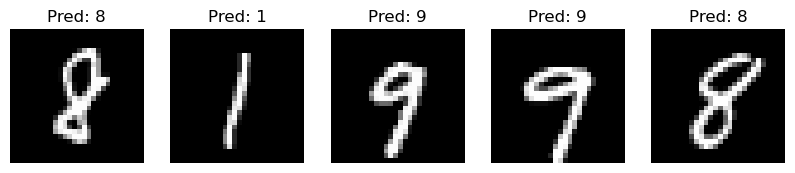

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import pandas as pd

df_train = pd.read_csv("C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\train.csv")
df_test = pd.read_csv("C:\\Users\\Dharani Ravi\\Downloads\\digit-recognizer\\test.csv")

X = df_train.drop(columns=['label']).values / 255.0 
y = df_train['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='softmax', input_shape=(784,))
    ])
    return model

model = build_model()

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')
predictions = model.predict(X_test[:5])
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {np.argmax(predictions[i])}')
    ax.axis('off')
plt.show()
